In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv("cleaning_data.csv")
data=data.drop("Unnamed: 0",axis=1)
data.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,ExterQual_TA,BsmtQual_Ex,KitchenQual_Ex,KitchenQual_TA,ExterQual_Ex,Foundation_CBlock,BsmtQual_TA
0,7,2003,2003,856.00,856.00,1710.00,2,8.00,2.00,548.00,208500.00,0,0,0,0,0,0,0
1,6,1976,1976,1262.00,1262.00,1262.00,2,6.00,2.00,460.00,181500.00,1,0,0,1,0,1,0
2,7,2001,2002,920.00,920.00,1786.00,2,6.00,2.00,608.00,223500.00,0,0,0,0,0,0,0
3,7,1915,1970,756.00,961.00,1717.00,1,7.00,3.00,642.00,140000.00,1,0,0,0,0,0,1
4,8,2000,2000,1145.00,1145.00,2198.00,2,9.00,3.00,836.00,250000.00,0,0,0,0,0,0,0


In [3]:
#Division of data as x and y
x=data.drop("SalePrice",axis=1).values
y=data["SalePrice"].values

In [4]:
#dividing data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:
#standardization of data
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [6]:
#Create the table with statsmodels
model_sm=sm.OLS(y,sm.add_constant(x)).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     504.4
Date:                Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:14:58   Log-Likelihood:                -16885.
No. Observations:                1460   AIC:                         3.381e+04
Df Residuals:                    1442   BIC:                         3.390e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.435e+05   1.02e+05     -9.279      0.000   -1.14e+06   -7.44e+05
x1          1.151e+04    880.242     13.075      0.000    9782.213    1.32e+04
x2           221.1307     38.002      5.819      0.000     146.586     295.675
x3           254.6909     46.083      5.527      0.000     164.293     345.088
x4            25.8395      3.222      8.019      0.000      19.519      32.160
x5             4.6758      3.515      1.330      0.184      -2.219      11.571
x6            56.8991      3.196     17.803      0.000      50.630      63.169
x7         -6383.7604   1869.536     -3.415      0.001   -1.01e+04   -2716.458
x8         -2127.0037    832.530     -2.555      0.011   -3760.104    -493.903
x9          4697.5097   2186.920      2.148      0.032     407.624    8987.395
x10           24.4457      7.518      3.252      0.001       9.699      39.192
x11        -4647.8148   2256.415     -2.060      0.040   -9074.021    -221.608
x12          1.83e+04   3233.735      5.660      0.000     1.2e+04    2.46e+04
x13         1.432e+04   3494.135      4.097      0.000    7461.117    2.12e+04
x14        -7870.0873   1970.584     -3.994      0.000   -1.17e+04   -4004.569
x15         -830.8029   4720.387     -0.176      0.860   -1.01e+04    8428.758
x16         3470.0508   1771.811      1.958      0.050      -5.552    6945.654
x17        -4686.4540   2050.702     -2.285      0.022   -8709.132    -663.776
==============================================================================
Omnibus:                      303.371   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3124.575
Skew:                          -0.656   Prob(JB):                         0.00
Kurtosis:                      10.046   Cond. No.                     5.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

100%|██████████| 42/42 [00:19<00:00,  2.19it/s]


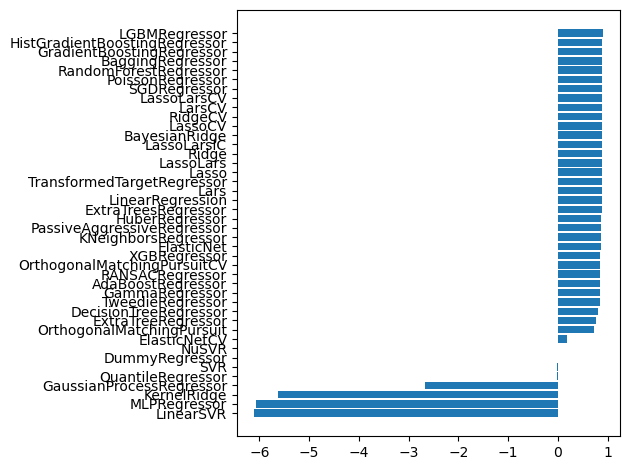

In [7]:
#Determining the model that gives the high r2 value with lazy predict
clf=LazyRegressor()
models,predict=clf.fit(x_train,x_test,y_train,y_test)
sort=models.sort_values(by="R-Squared")
plt.barh(sort.index,sort["R-Squared"])
plt.tight_layout()
plt.show()

In [8]:
import lightgbm as lgbm
lgbm=lgbm.LGBMRegressor()
lgbm.fit(x_train,y_train)

LGBMRegressor()

In [9]:
#I measured the success of the model
y_pred=lgbm.predict(x_test)
r2_lgbm=r2_score(y_test,y_pred)
print(r2_lgbm)

0.8991534836605475


In [10]:
scores = cross_val_score(lgbm, x, y, cv=5, scoring='r2')
print("mean R^2 score: {:.2f}".format(scores.mean()))

mean R^2 score: 0.86


In [11]:
#saving the model
import pickle 
filename="model.pickle"
pickle.dump(lgbm,open(filename,"wb"))